In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


from google.colab import drive
import os


# Set the directory paths
test_dir = '/content/drive/MyDrive/eye dataset/test'
train_dir = '/content/drive/MyDrive/eye dataset/train'

# Verify folder contents
print(os.listdir('.'))


# Set up data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical',
    classes=['AMD', 'DME', 'Normal']
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical',
    classes=['AMD', 'DME', 'Normal']
)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train the model
epochs = 50

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


['DME', 'AMD', 'Normal']
Found 2815 images belonging to 3 classes.
Found 433 images belonging to 3 classes.


Epoch 1/50
21/21 [==============================] - 823s 39s/step - loss: 1.0422 - accuracy: 0.4444 - val_loss: 0.9355 - val_accuracy: 0.4818
Epoch 2/50
21/21 [==============================] - 30s 1s/step - loss: 0.9156 - accuracy: 0.5564 - val_loss: 0.7769 - val_accuracy: 0.5781
Epoch 3/50
21/21 [==============================] - 26s 1s/step - loss: 0.8202 - accuracy: 0.6118 - val_loss: 0.6645 - val_accuracy: 0.6667
Epoch 4/50
21/21 [==============================] - 27s 1s/step - loss: 0.7864 - accuracy: 0.6267 - val_loss: 0.5572 - val_accuracy: 0.8177
Epoch 5/50
21/21 [==============================] - 27s 1s/step - loss: 0.7204 - accuracy: 0.6528 - val_loss: 0.4594 - val_accuracy: 0.8203
Epoch 6/50
21/21 [==============================] - 29s 1s/step - loss: 0.7178 - accuracy: 0.6565 - val_loss: 0.5755 - val_accuracy: 0.6979
Epoch 7/50
21/21 [==============================] - 26s 1s/step - loss: 0.6806 - accuracy: 0.6863 - val_loss: 0.4479 - val_accuracy: 0.8047
Epoch 8/50
21/21 [

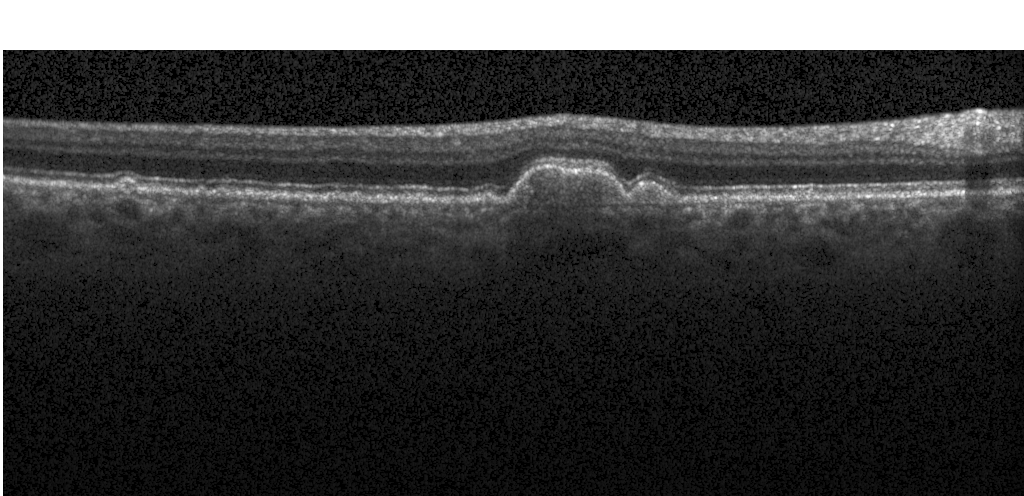

1/1 [==============================] - 0s 41ms/step
Predicted class label: AMD


In [24]:

# Load an image for prediction
image_path = '/content/01.tif'  # Replace with the path to your image

# Preprocess the image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

from PIL import Image

# Display the image at actual size and quality
img = Image.open(image_path)
img.show()

# Perform prediction
prediction = model.predict(img_array)
class_labels = train_generator.class_indices

# Convert prediction to class label
predicted_class_label = list(class_labels.keys())[np.argmax(prediction)]

# Print the predicted class label
print("Predicted class label:", predicted_class_label)
